In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv('HSAD.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            28200 non-null  object 
 1   Prefecture      28200 non-null  int64  
 2   Prefecturename  28200 non-null  object 
 3   HSAD            28200 non-null  int64  
 4   Year            28200 non-null  int64  
 5   Month           28200 non-null  int64  
 6   Day             28200 non-null  int64  
 7   Dow             28200 non-null  int64  
 8   Holiday         28200 non-null  int64  
 9   Tempmax         28200 non-null  float64
 10  Rhumave         28200 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 2.4+ MB


In [ ]:
data.head()

,Date,Prefecture,Prefecturename,HSAD,Year,Month,Day,Dow,Holiday,Tempmax,Rhumave
0,2015/6/1,1,Hokkaido,5,2015,6,1,2,0,27.8,36.0
1,2015/6/2,1,Hokkaido,1,2015,6,2,3,0,25.5,58.0
2,2015/6/3,1,Hokkaido,1,2015,6,3,4,0,23.8,73.0
3,2015/6/4,1,Hokkaido,0,2015,6,4,5,0,16.0,76.0
4,2015/6/5,1,Hokkaido,0,2015,6,5,6,0,12.9,80.0


Date sütunu içinde yer alan tarih bilgileri yıl, ay ve gün olarak yazıldığı için dönüştürmeye ihtiyaç duymadan silinebilir.

In [ ]:
# Doğru yazımı doğrulamak için sütun adlarını yazdırın
print(data.columns)

# Doğru sütun adını doğruladıktan sonra, sütunu silmek için kullanın
data = data.drop('Date', axis=1)

Index(['Date', 'Prefecture', 'Prefecturename', 'HSAD', 'Year', 'Month', 'Day',
       'Dow', 'Holiday', 'Tempmax', 'Rhumave'],
      dtype='object')


In [ ]:
le = LabelEncoder()
data['Prefecturename_encoded'] = le.fit_transform(data['Prefecturename'])
data = data.drop(['Prefecturename', 'Prefecture'], axis=1)

In [ ]:
# Prefecturename ile Prefecturename_encoded eşleşmelerini DataFrame olarak göster
label_mapping = pd.DataFrame({
    'Prefecturename': le.classes_,
    'Prefecturename_encoded': range(len(le.classes_))
})

print(label_mapping)


   Prefecturename  Prefecturename_encoded
0           Aichi                       0
1           Akita                       1
2          Aomori                       2
3           Chiba                       3
4           Ehime                       4
5           Fukui                       5
6         Fukuoka                       6
7       Fukushima                       7
8            Gifu                       8
9           Gunma                       9
10      Hiroshima                      10
11       Hokkaido                      11
12          Hyogo                      12
13        Ibaraki                      13
14       Ishikawa                      14
15          Iwate                      15
16         Kagawa                      16
17      Kagoshima                      17
18       Kanagawa                      18
19          Kochi                      19
20       Kumamoto                      20
21          Kyoto                      21
22            Mie                 

In [ ]:
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)

HSAD                      0
Year                      0
Month                     0
Day                       0
Dow                       0
Holiday                   0
Tempmax                   0
Rhumave                   0
Prefecturename_encoded    0
dtype: int64


In [ ]:
data.head()

,HSAD,Year,Month,Day,Dow,Holiday,Tempmax,Rhumave,Prefecturename_encoded
0,5,2015,6,1,2,0,27.8,36.0,11
1,1,2015,6,2,3,0,25.5,58.0,11
2,1,2015,6,3,4,0,23.8,73.0,11
3,0,2015,6,4,5,0,16.0,76.0,11
4,0,2015,6,5,6,0,12.9,80.0,11


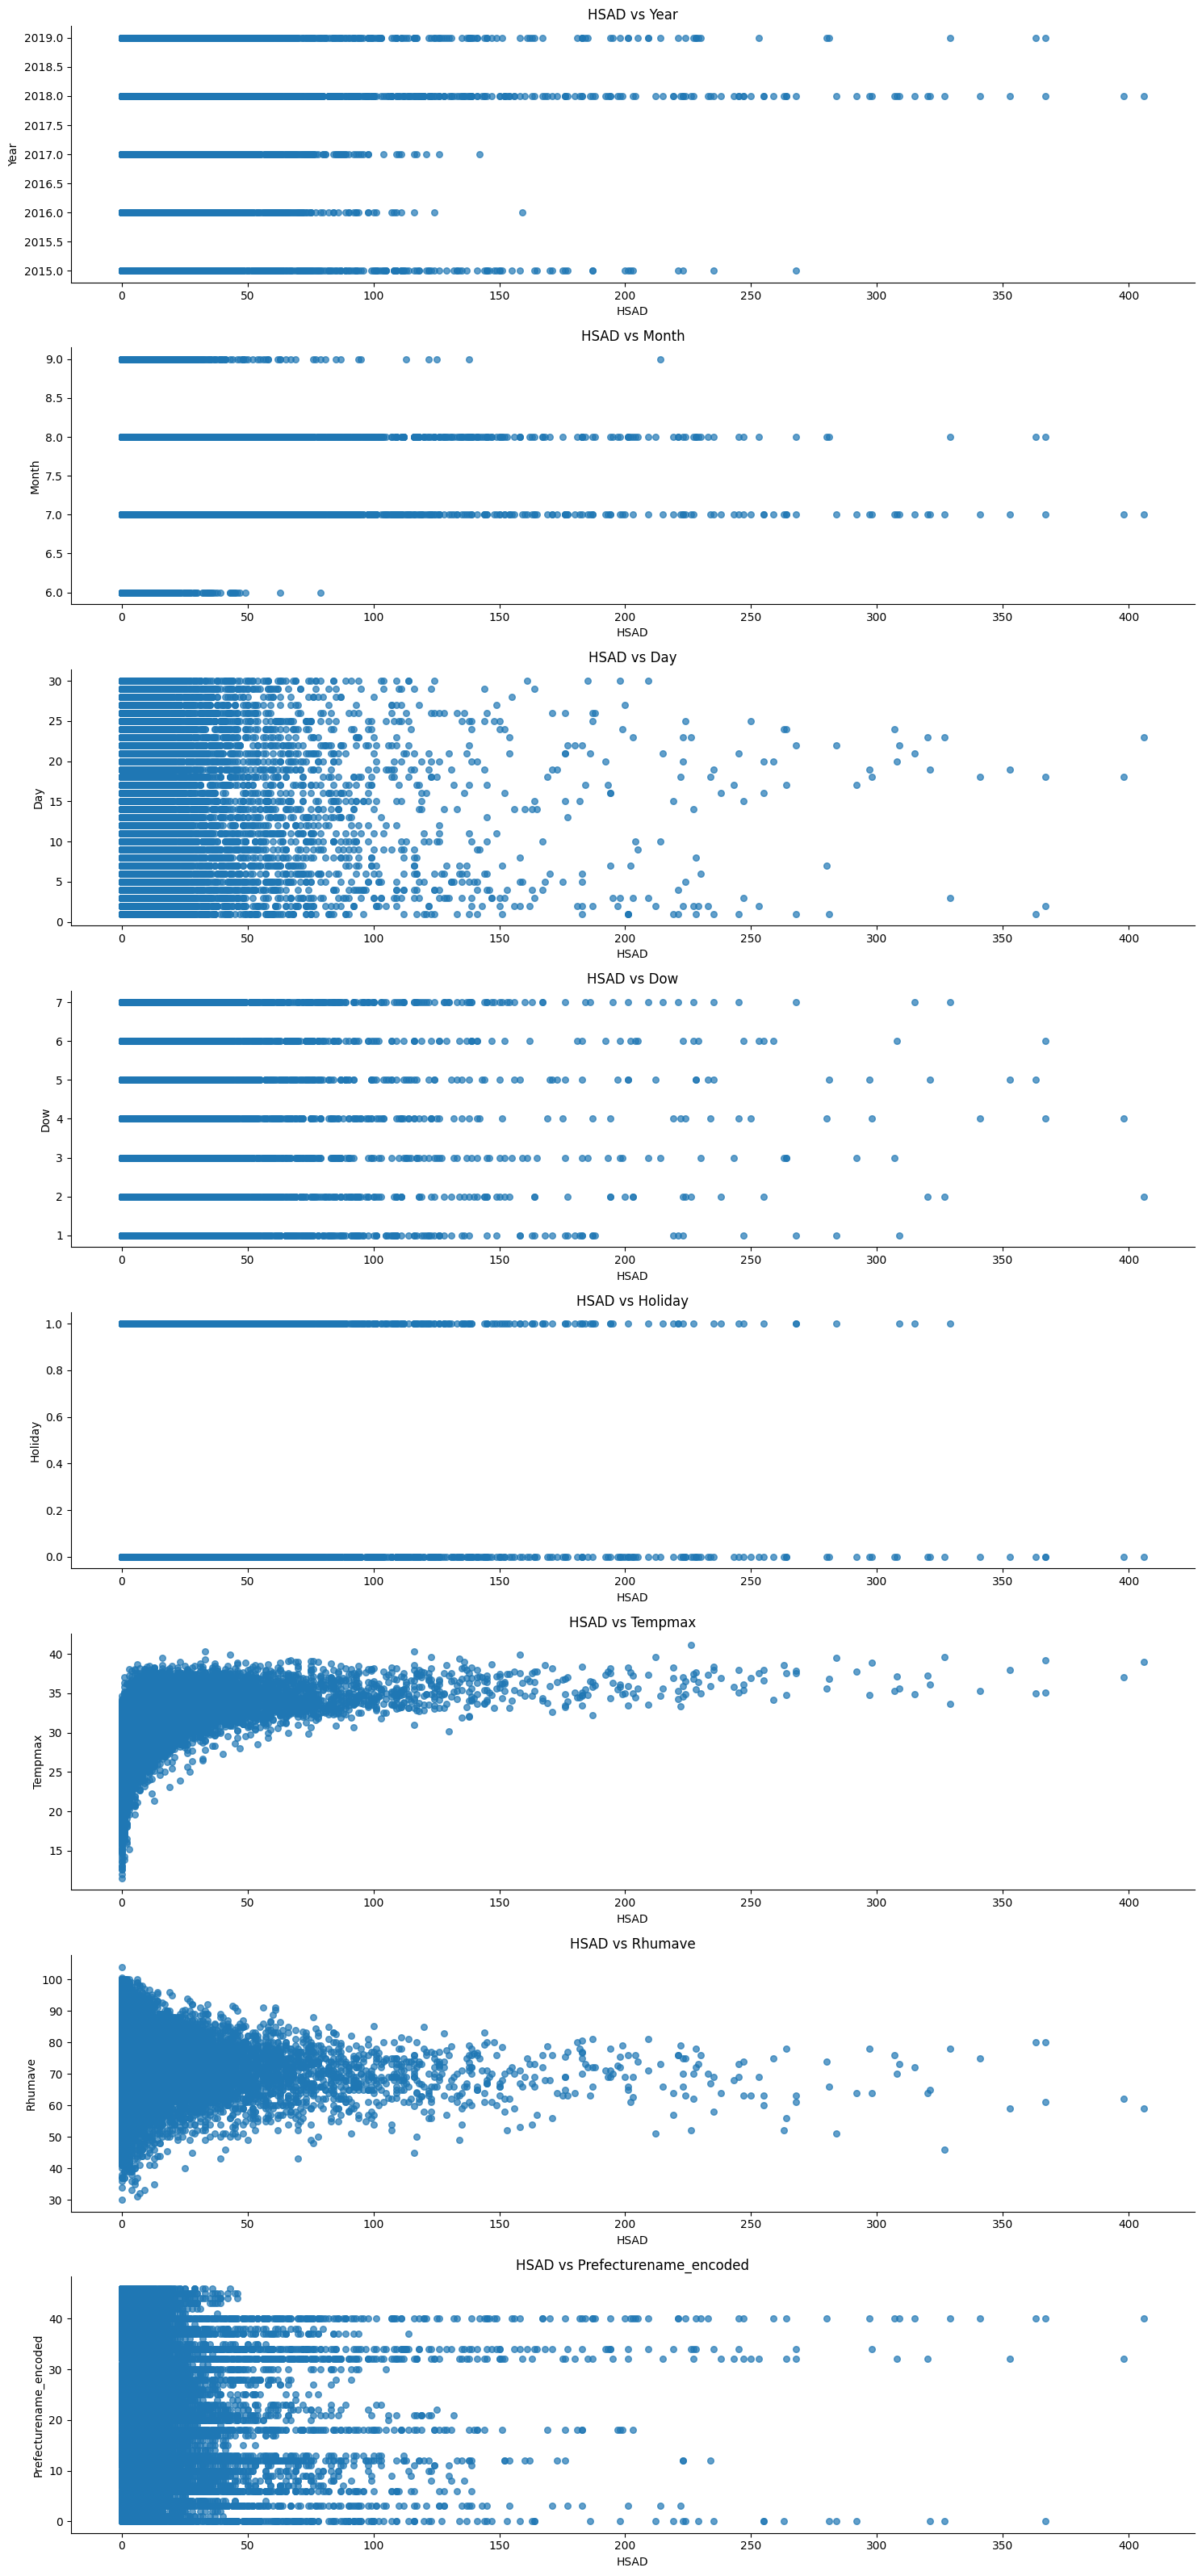

In [ ]:
# HSAD ile karşılaştırmak için kullanılacak sütunları seç
features = data.select_dtypes(include=['number']).columns.tolist()
features = [col for col in features if col != 'HSAD']  # HSAD'yi çıkar

# Grafik boyutlarını ayarla
plt.figure(figsize=(15, 4 * len(features)))

# Her bir sütun için scatter plot çiz
for i, col in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    plt.scatter(data['HSAD'], data[col], s=30, alpha=0.7)
    plt.title(f'HSAD vs {col}')
    plt.xlabel('HSAD')
    plt.ylabel(col)
    plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

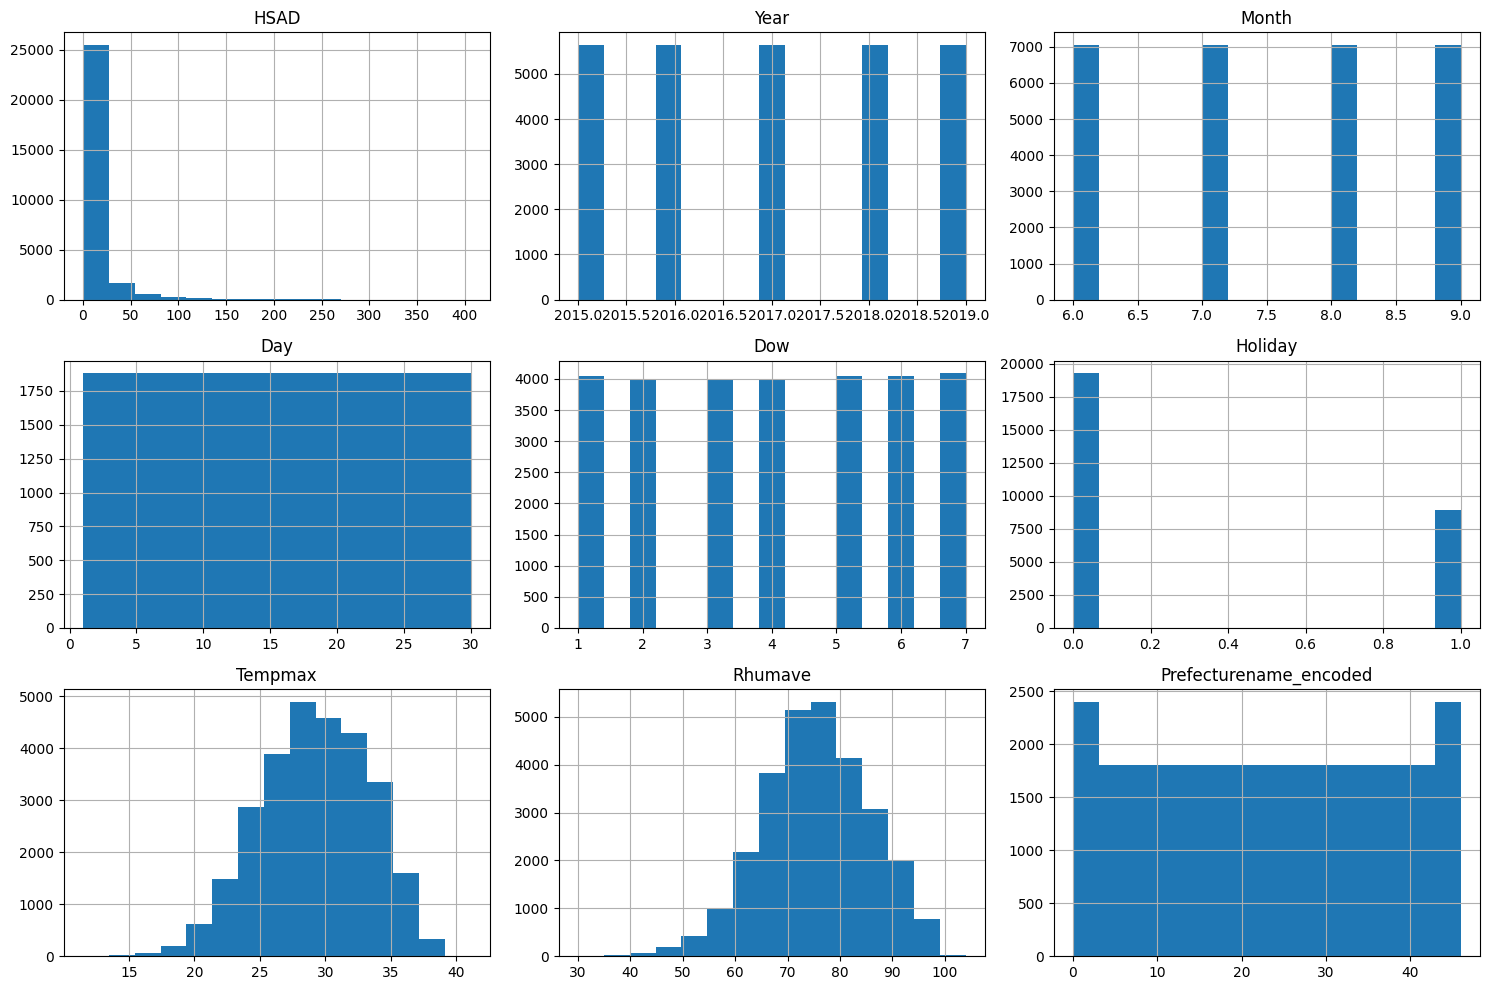

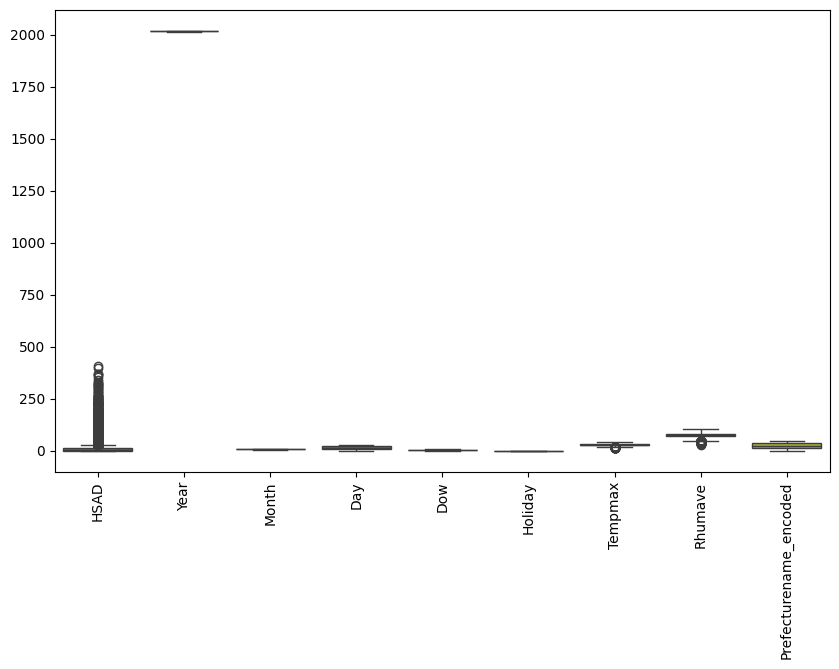

In [ ]:
# Tüm sütunlar için histogramlar
data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Sayısal sütunları seç
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Min-Max scaler uygula
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [ ]:
data.head()

,HSAD,Year,Month,Day,Dow,Holiday,Tempmax,Rhumave,Prefecturename_encoded
0,0.012315,0.0,0.0,0.000000,0.166667,0.0,0.550676,0.081081,0.23913
1,0.002463,0.0,0.0,0.034483,0.333333,0.0,0.472973,0.378378,0.23913
2,0.002463,0.0,0.0,0.068966,0.500000,0.0,0.415541,0.581081,0.23913
3,0.000000,0.0,0.0,0.103448,0.666667,0.0,0.152027,0.621622,0.23913
4,0.000000,0.0,0.0,0.137931,0.833333,0.0,0.047297,0.675676,0.23913


In [ ]:
class_distribution = data['HSAD'].value_counts()
class_percentage = data['HSAD'].value_counts(normalize=True) * 100

print("📊 Heatstroke Ambulance Dispatches (HSAD) - Sınıf Dağılımı:\n")
for value in class_distribution.index:
    print(f"  - HSAD = {value}: {class_distribution[value]} örnek (%{class_percentage[value]:.2f})")

📊 Heatstroke Ambulance Dispatches (HSAD) - Sınıf Dağılımı:

  - HSAD = 0.0: 6475 örnek (%22.96)
  - HSAD = 0.0024630541871921183: 3904 örnek (%13.84)
  - HSAD = 0.0049261083743842365: 2604 örnek (%9.23)
  - HSAD = 0.007389162561576354: 1781 örnek (%6.32)
  - HSAD = 0.009852216748768473: 1432 örnek (%5.08)
  - HSAD = 0.012315270935960592: 1079 örnek (%3.83)
  - HSAD = 0.014778325123152709: 947 örnek (%3.36)
  - HSAD = 0.017241379310344827: 809 örnek (%2.87)
  - HSAD = 0.019704433497536946: 719 örnek (%2.55)
  - HSAD = 0.022167487684729065: 660 örnek (%2.34)
  - HSAD = 0.024630541871921183: 565 örnek (%2.00)
  - HSAD = 0.027093596059113302: 520 örnek (%1.84)
  - HSAD = 0.029556650246305417: 446 örnek (%1.58)
  - HSAD = 0.03201970443349754: 399 örnek (%1.41)
  - HSAD = 0.034482758620689655: 357 örnek (%1.27)
  - HSAD = 0.03694581280788178: 339 örnek (%1.20)
  - HSAD = 0.03940886699507389: 302 örnek (%1.07)
  - HSAD = 0.04187192118226601: 284 örnek (%1.01)
  - HSAD = 0.04433497536945813: 2

In [ ]:
# Sınıflandırma fonksiyonu
def hsad_gruplandir(hsad):
    if hsad == 0.0:
        return 0  # Ambulans Çağrısı Yok
    elif 0.0001 <= hsad <= 0.01:
        return 1  # Düşük
    elif 0.01 < hsad <= 0.03:
        return 2  # Orta
    elif 0.03 < hsad <= 0.07:
        return 3  # Yüksek
    elif hsad > 0.07:
        return 4  # Çok Yüksek
    else:
        return -1  # Tanımsız durumlar için

# Yeni sütun olarak sınıfları ekleme
data['HSAD_Grup'] = data['HSAD'].apply(hsad_gruplandir)

In [ ]:
data['HSAD_Grup'].head()

,HSAD_Grup
0,2
1,1
2,1
3,0
4,0


In [ ]:
data.head()

,HSAD,Year,Month,Day,Dow,Holiday,Tempmax,Rhumave,Prefecturename_encoded,HSAD_Grup
0,0.012315,0.0,0.0,0.000000,0.166667,0.0,0.550676,0.081081,0.23913,2
1,0.002463,0.0,0.0,0.034483,0.333333,0.0,0.472973,0.378378,0.23913,1
2,0.002463,0.0,0.0,0.068966,0.500000,0.0,0.415541,0.581081,0.23913,1
3,0.000000,0.0,0.0,0.103448,0.666667,0.0,0.152027,0.621622,0.23913,0
4,0.000000,0.0,0.0,0.137931,0.833333,0.0,0.047297,0.675676,0.23913,0


In [ ]:
class_distribution = data['HSAD_Grup'].value_counts()
class_percentage = data['HSAD_Grup'].value_counts(normalize=True) * 100

print("📊 Heatstroke Ambulance Dispatches (HSAD) - Sınıf Dağılımı:\n")
for value in class_distribution.index:
    print(f"  - HSAD_Grup = {value}: {class_distribution[value]} örnek (%{class_percentage[value]:.2f})")

📊 Heatstroke Ambulance Dispatches (HSAD) - Sınıf Dağılımı:

  - HSAD_Grup = 1: 9721 örnek (%34.47)
  - HSAD_Grup = 0: 6475 örnek (%22.96)
  - HSAD_Grup = 2: 5745 örnek (%20.37)
  - HSAD_Grup = 3: 3651 örnek (%12.95)
  - HSAD_Grup = 4: 2608 örnek (%9.25)


In [ ]:
data.drop('HSAD', axis=1, inplace=True)

In [ ]:
from imblearn.over_sampling import SMOTE

# Bağımsız ve bağımlı değişkenleri ayır
X = data.drop('HSAD_Grup', axis=1)
y = data['HSAD_Grup']

# SMOTE ile oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Yeni sınıf dağılımını kontrol et
print("Yeni HSAD_Grup Dağılımı:")
print(y_resampled.value_counts())


Yeni HSAD_Grup Dağılımı:
HSAD_Grup
2    9721
1    9721
0    9721
3    9721
4    9721
Name: count, dtype: int64


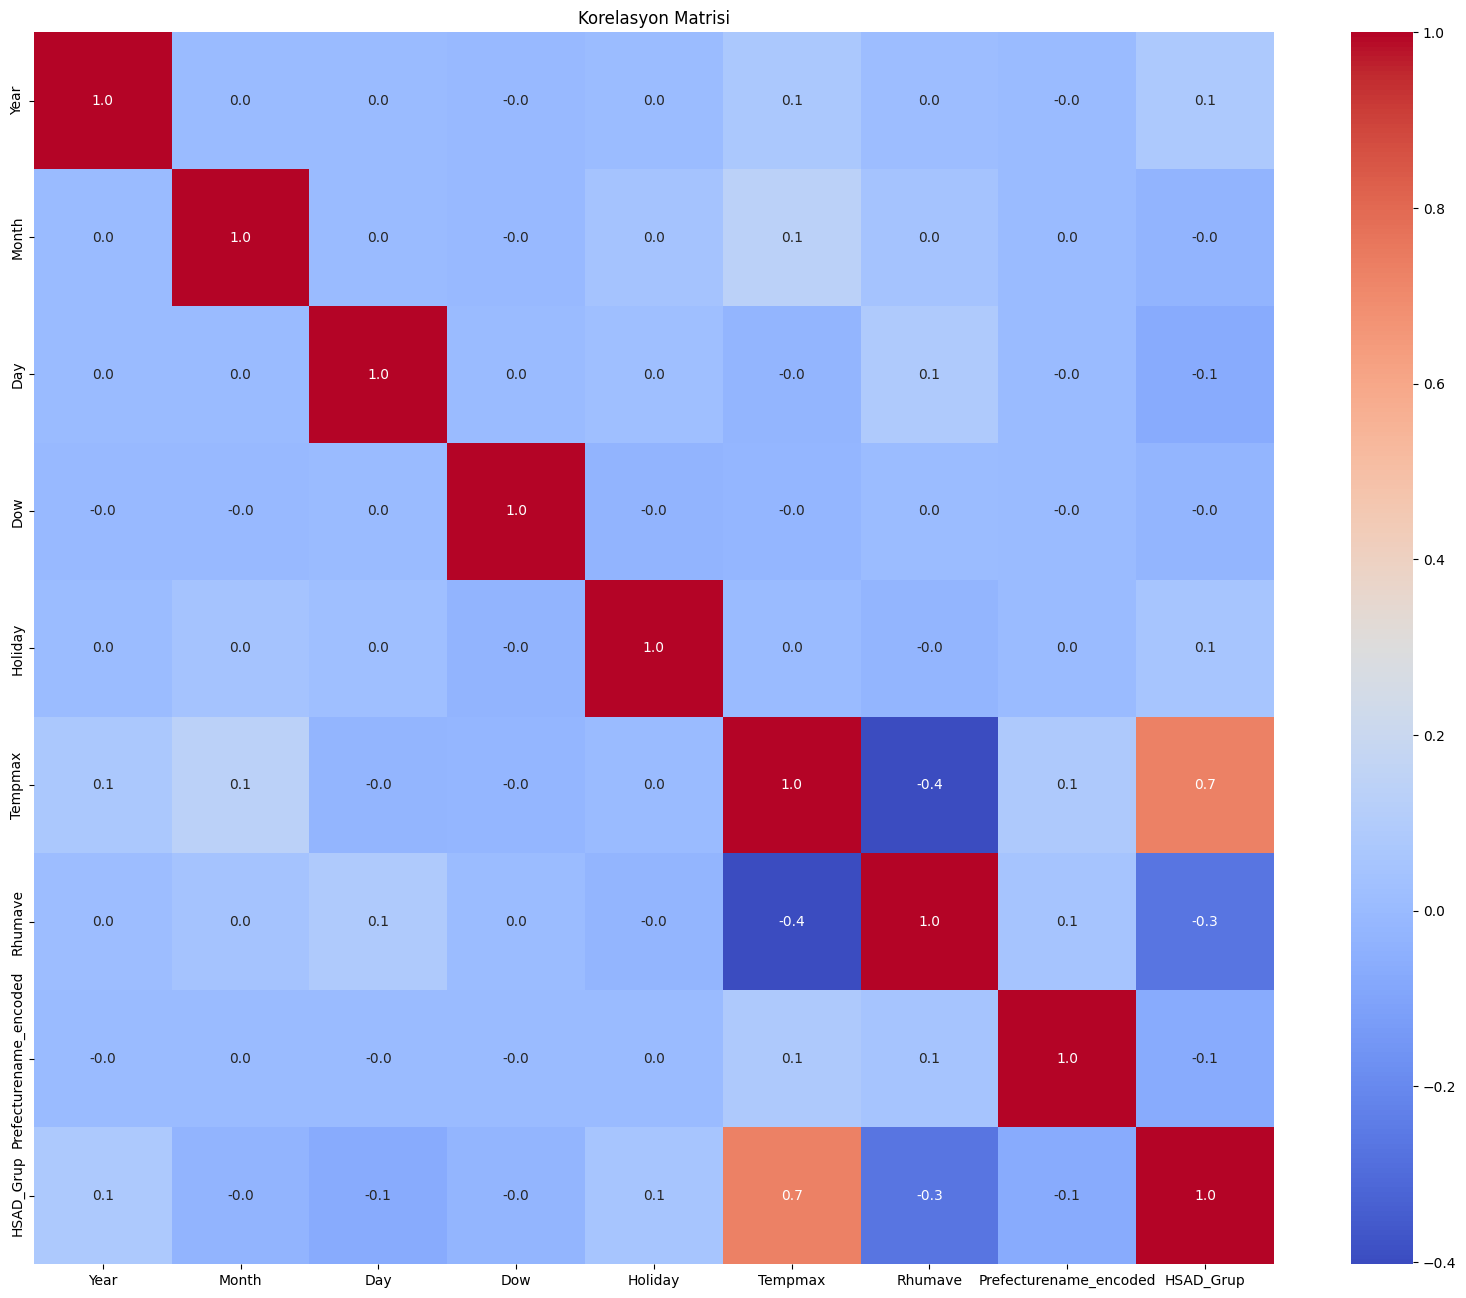

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(data.corr(), annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

In [ ]:
# Bağımlı ve bağımsız değişkenlerin ayrılması
X = data.drop(columns=["HSAD_Grup"])
y = data["HSAD_Grup"]

# 1.Eğitim ve test setine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 2. SMOTE ile oversampling sadece eğitim verisine
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 3. Modeli bu verilerle eğit ve test et
# model.fit(X_train_res, y_train_res)
# y_pred = model.predict(X_test)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'  # veya 'f1_weighted', 'recall_weighted' sınıflar dengesizse
)

In [ ]:
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

Accuracy: 0.5534278959810874
Precision (macro): 0.532891045605781
Recall (macro): 0.556138763263244
F1-Score (macro): 0.5422820251508109

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.67      1947
           1       0.60      0.56      0.58      2928
           2       0.44      0.43      0.43      1719
           3       0.40      0.40      0.40      1067
           4       0.56      0.72      0.63       799

    accuracy                           0.55      8460
   macro avg       0.53      0.56      0.54      8460
weighted avg       0.55      0.55      0.55      8460



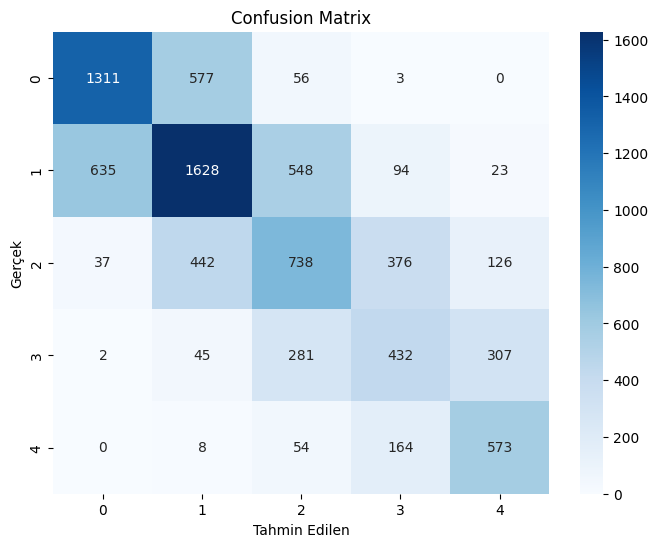

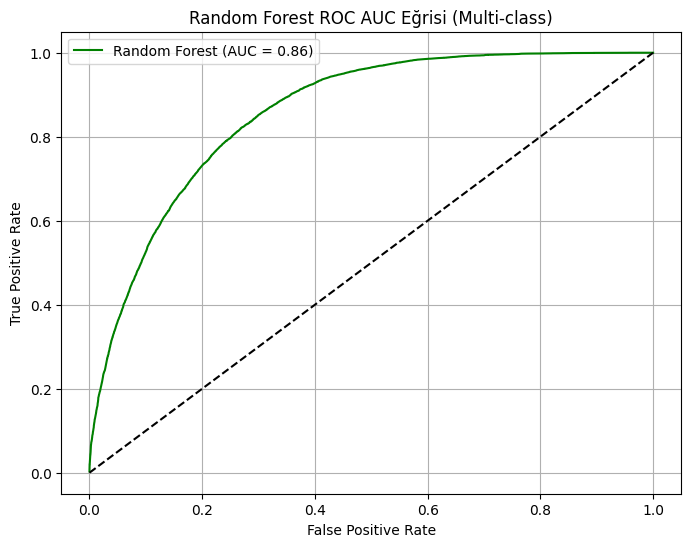

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Modeli oluştur
rf = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=30, min_samples_split=5, min_samples_leaf=2)

# Modeli eğit
rf.fit(X_train_res, y_train_res)

# Test seti üzerinde tahmin yap
y_pred = rf.predict(X_test)

# Performans metriklerini yazdır
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

# ROC
# n_classes'ı tanımlamak için test kümesindeki benzersiz sınıflar alınır
classes = np.unique(y_test)
n_classes = len(classes)

# Her sınıf için öngörülen olasılıklar hesaplanır
y_score = rf.predict_proba(X_test)

# Çoklu sınıflandırma ROC AUC hesaplaması için gerçek etiketler ikili hale getirilir
y_test_binarized = label_binarize(y_test, classes=classes)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# micro-average ROC eğrisi ve ROC alanı hesaplanır
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# macro-average ROC eğrisi ve ROC alanı hesaplanır
# Öncelikle tüm yanlış pozitif oranlar toplanır
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Daha sonra bu noktalardaki tüm ROC eğrileri interpolate edilir
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Son olarak ortalama alınır ve AUC hesaplanır
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)


# Grafik
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='green', label=f"Random Forest (AUC = {roc_auc_macro:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Random Forest ROC AUC Eğrisi (Multi-class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.5581560283687943
Precision (macro): 0.5391444421203724
Recall (macro): 0.5700737288392626
F1-Score (macro): 0.5513095694467255

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68      1947
           1       0.61      0.54      0.57      2928
           2       0.44      0.41      0.42      1719
           3       0.41      0.42      0.42      1067
           4       0.59      0.77      0.67       799

    accuracy                           0.56      8460
   macro avg       0.54      0.57      0.55      8460
weighted avg       0.56      0.56      0.56      8460



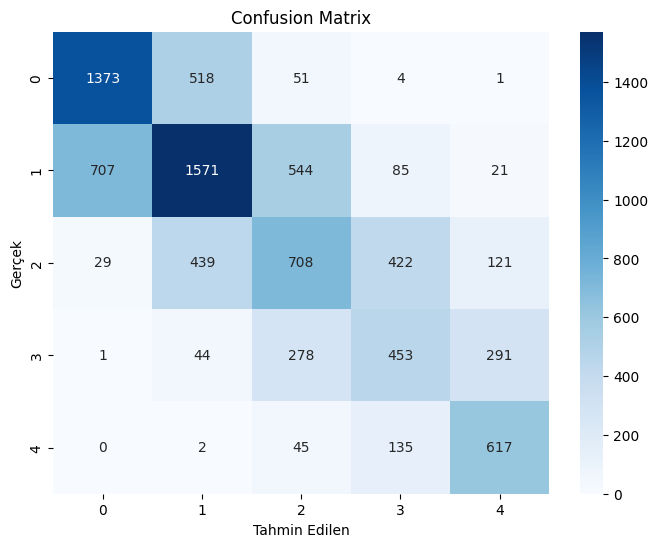

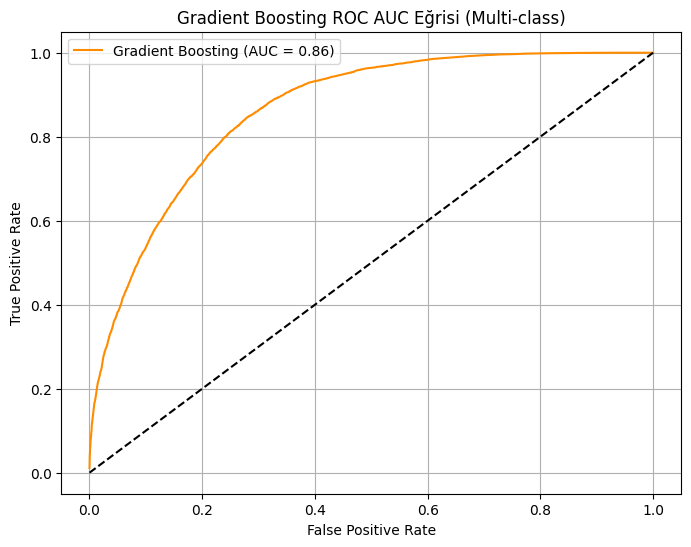

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_res, y_train_res)
y_pred = gb_model.predict(X_test)

# Performans metriklerini yazdır
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

# ROC
# n_classes'ı tanımlamak için test kümesindeki benzersiz sınıflar alınır
classes = np.unique(y_test)
n_classes = len(classes)

# Her sınıf için öngörülen olasılıklar hesaplanır
y_score = gb_model.predict_proba(X_test)

# Çoklu sınıflandırma ROC AUC hesaplaması için gerçek etiketler ikili hale getirilir
y_test_binarized = label_binarize(y_test, classes=classes)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Use the binarized y_test_binarized for calculating ROC curve
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# micro-average ROC eğrisi ve ROC alanı hesaplanır
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# macro-average ROC eğrisi ve ROC alanı hesaplanır
# Öncelikle tüm yanlış pozitif oranlar toplanır
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Daha sonra bu noktalardaki tüm ROC eğrileri interpolate edilir
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Son olarak ortalama alınır ve AUC hesaplanır
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# Grafik
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='darkorange', label=f"Gradient Boosting (AUC = {roc_auc_macro:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Gradient Boosting ROC AUC Eğrisi (Multi-class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.4794326241134752
Precision (macro): 0.46452419450117494
Recall (macro): 0.43740008179497136
F1-Score (macro): 0.4474471726416738

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.56      0.56      1300
           1       0.50      0.59      0.54      1938
           2       0.39      0.36      0.38      1161
           3       0.40      0.31      0.35       721
           4       0.48      0.37      0.42       520

    accuracy                           0.48      5640
   macro avg       0.46      0.44      0.45      5640
weighted avg       0.47      0.48      0.47      5640



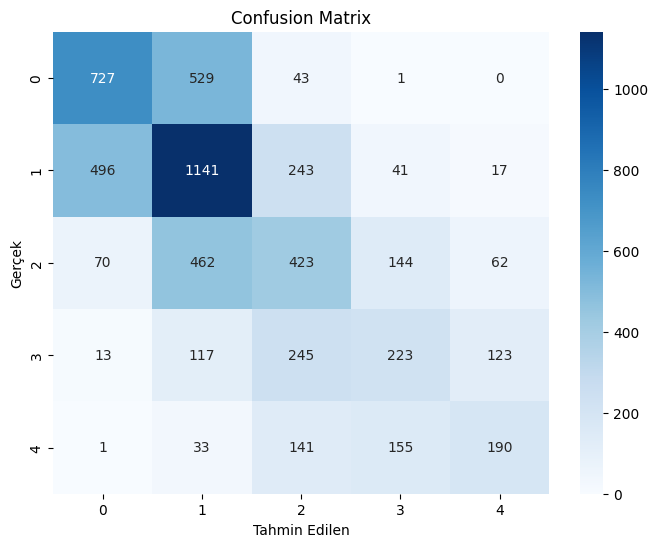

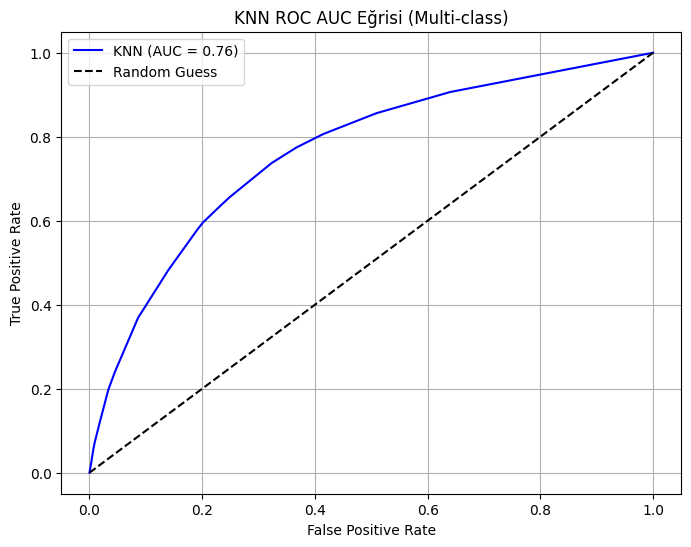

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
# Hedef ve giriş verisi
X = data.drop('HSAD_Grup', axis=1)
y = data['HSAD_Grup']

# Çok sınıflı etiketi one-hot'a çevir
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Eğitim/Test bölmesi (using test_size=0.2 as in the original cell)
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# KNN modeli
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn.fit(X_train, y_train)
y_score = knn.predict_proba(X_test)

# KNN'nin predict metodunu kullanarak sınıf tahminlerini alıyoruz.
# OneVsRestClassifier'da predict metodunun çıktısı çok etiketli binarize formattadır,
# ancak metrikler için genellikle tek etiketli format istenir.
# Bu durumda, her örnek için en yüksek olasılığa sahip sınıfı seçerek tek etiketli tahmin elde edebiliriz.
y_pred_knn = np.argmax(y_score, axis=1)
# Gerçek test etiketlerini de tek etiketli formata dönüştürmemiz gerekiyor
y_test_single_label = np.argmax(y_test, axis=1)


# Performans metriklerini yazdır (y_test_single_label ve y_pred_knn kullanılıyor)
print("Accuracy:", accuracy_score(y_test_single_label, y_pred_knn))
# Macro average için precision, recall, f1_score, classification_report
# tek etiketli gerçek ve tahmin değerlerini bekler.
print("Precision (macro):", precision_score(y_test_single_label, y_pred_knn, average='macro'))
print("Recall (macro):", recall_score(y_test_single_label, y_pred_knn, average='macro'))
print("F1-Score (macro):", f1_score(y_test_single_label, y_pred_knn, average='macro'))
print("\nClassification Report:\n", classification_report(y_test_single_label, y_pred_knn))


# Confusion matrix görselleştirme (y_test_single_label ve y_pred_knn kullanılıyor)
# xticklabels ve yticklabels için sınıf etiketlerini kullanabiliriz.
# Orijinal data['HSAD_Grup']'taki benzersiz değerler sınıflarımızı temsil eder.
unique_classes = np.unique(data['HSAD_Grup'])
cm = confusion_matrix(y_test_single_label, y_pred_knn)
plt.figure(figsize=(8,6))
# xticklabels ve yticklabels olarak unique_classes'ı kullanıyoruz
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

# ROC eğrisi ve AUC (y_test binarize ve y_score probabiliteleri kullanılıyor)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Ortalama (makro) ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# Grafik
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='blue', label=f"KNN (AUC = {roc_auc_macro:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("KNN ROC AUC Eğrisi (Multi-class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()